In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import pandas as pd

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *

DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data (DATA_TRAIN_PATH)

## Data cleaning:

To acknowledge what features we are dealing with first, we should get a glance at each one of them in a statistical manner.

In [4]:
df_tX = pd.DataFrame (data = tX)
df_tX.columns = [('feature_' + str (i)) for i in range (30)] #['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

df_y = pd.DataFrame (data = y)
df_y.columns = ['Prediction']

df = pd.merge (df_y, df_tX, left_index = True, right_index = True, how='inner')
df.head ()

,Prediction,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
0,1.0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,-1.0,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-1.0,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,-1.0,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,-1.0,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [5]:
df.describe ()

,Prediction,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-0.314664,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,0.949205,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-1.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,-1.000000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,-1.000000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,1.000000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [53]:
ranges = []

for i in range (30):
    
    ind = df ['feature_' + str (i)]
    mn = np.floor (ind.min () / 10) * 10
    mx = np.ceil (ind.max () / 10) * 10
    ranges.append ([mn, mx])
    
ranges

[[-1000.0, 1200.0],
 [0.0, 700.0],
 [0.0, 1350.0],
 [0.0, 2840.0],
 [-1000.0, 10.0],
 [-1000.0, 4980.0],
 [-1000.0, 20.0],
 [0.0, 10.0],
 [0.0, 2840.0],
 [40.0, 1860.0],
 [0.0, 20.0],
 [-10.0, 10.0],
 [-1000.0, 10.0],
 [20.0, 770.0],
 [-10.0, 10.0],
 [-10.0, 10.0],
 [20.0, 570.0],
 [-10.0, 10.0],
 [-10.0, 10.0],
 [0.0, 2850.0],
 [-10.0, 10.0],
 [10.0, 2010.0],
 [0.0, 10.0],
 [-1000.0, 1130.0],
 [-1000.0, 10.0],
 [-1000.0, 10.0],
 [-1000.0, 730.0],
 [-1000.0, 10.0],
 [-1000.0, 10.0],
 [0.0, 1640.0]]

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007017EFC2B0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x0000006FEEF14D30>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000700A1618D0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x000000700A1EF908>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000701892F940>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x0000007016BF29B0>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000701C4E14E0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x000000701BE627F0>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000701D33AAC8>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x000000701BF56EB8>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000701DF5B4A8>,
         <matplotlib.axes._subplots.AxesSubplo

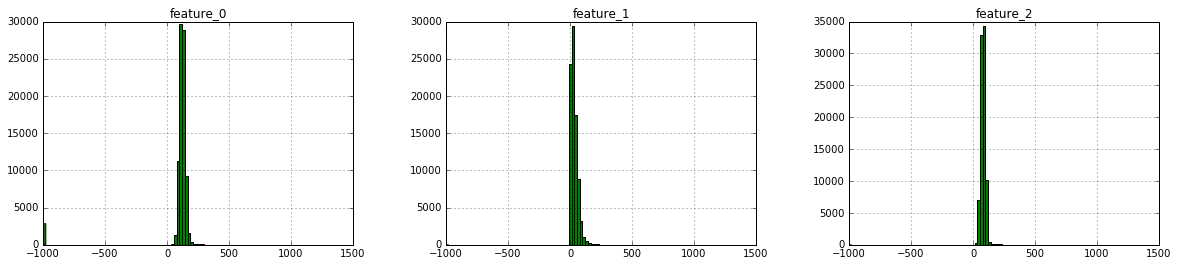

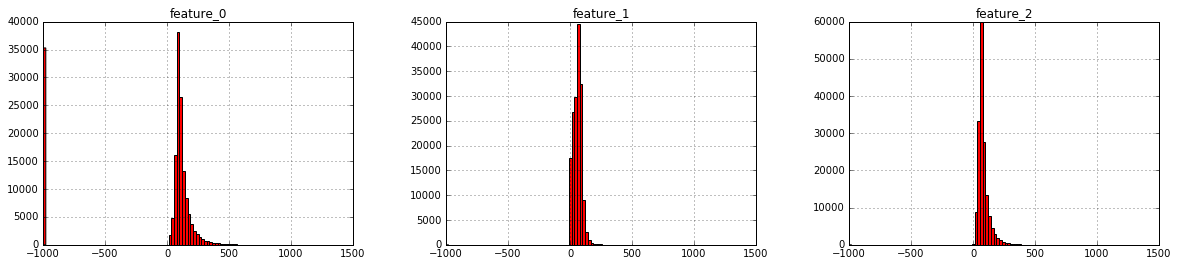

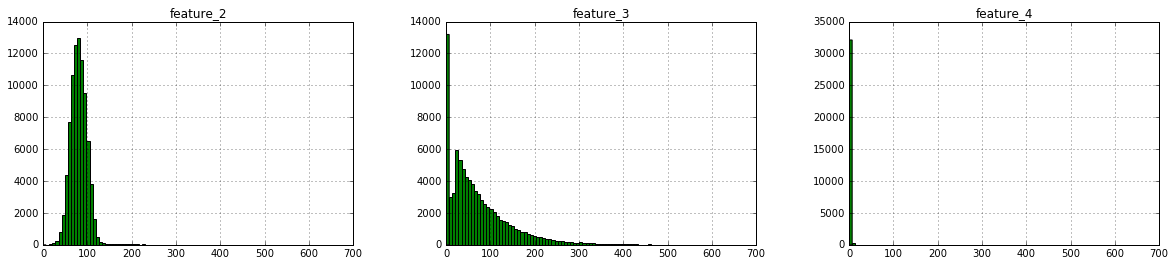

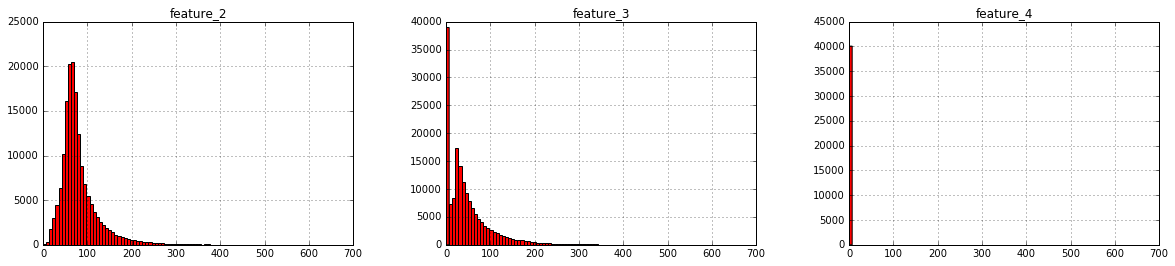

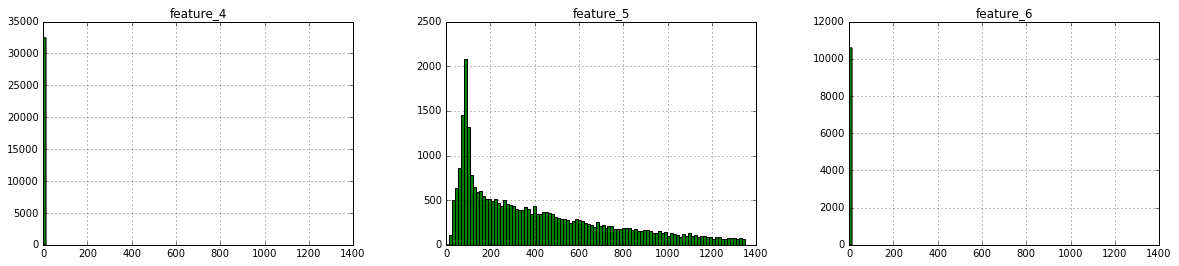

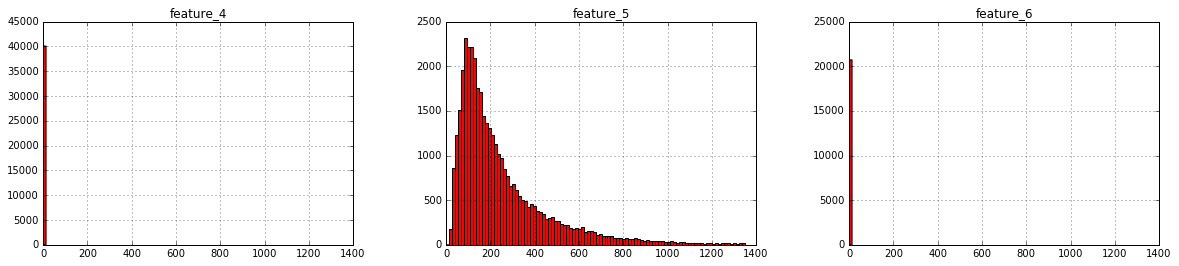

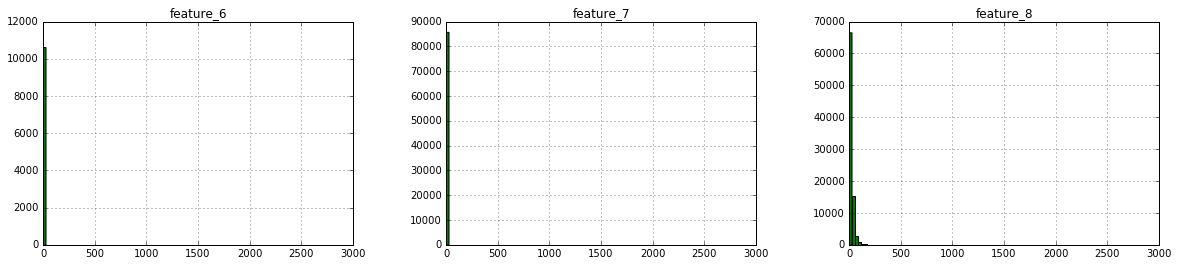

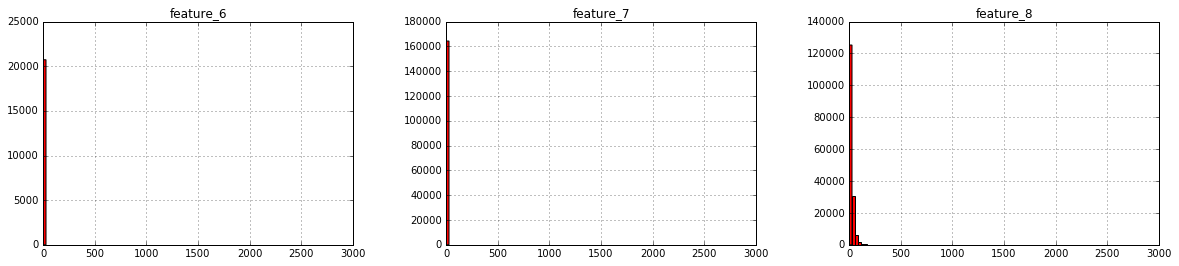

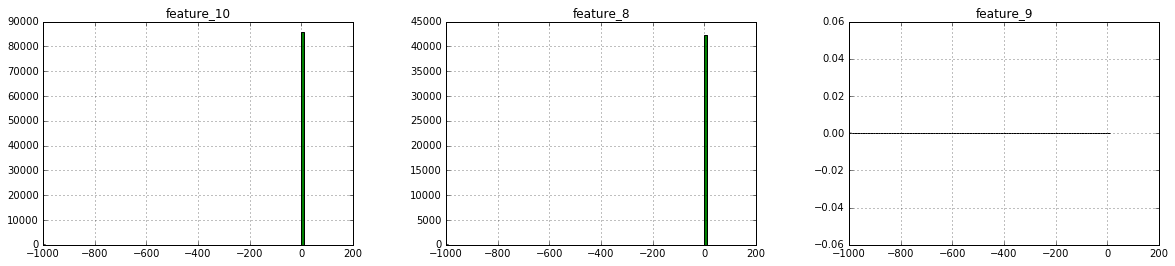

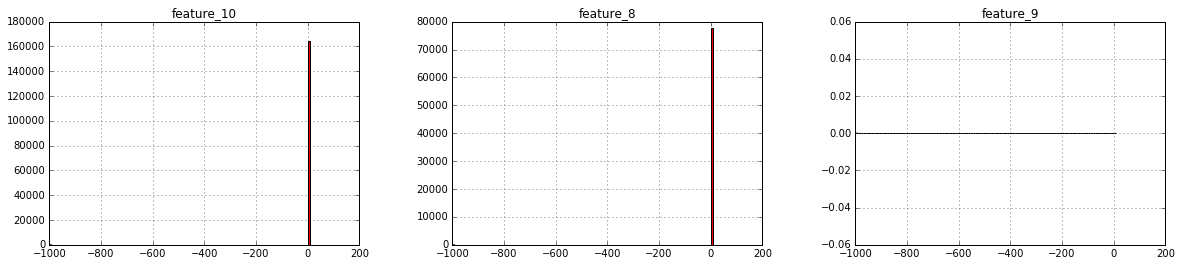

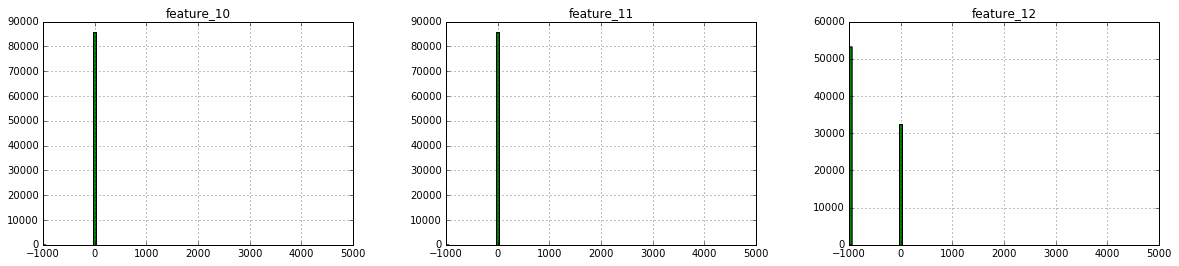

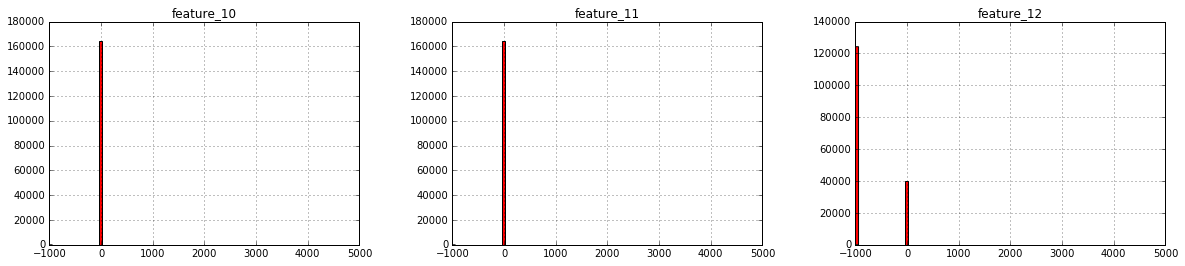

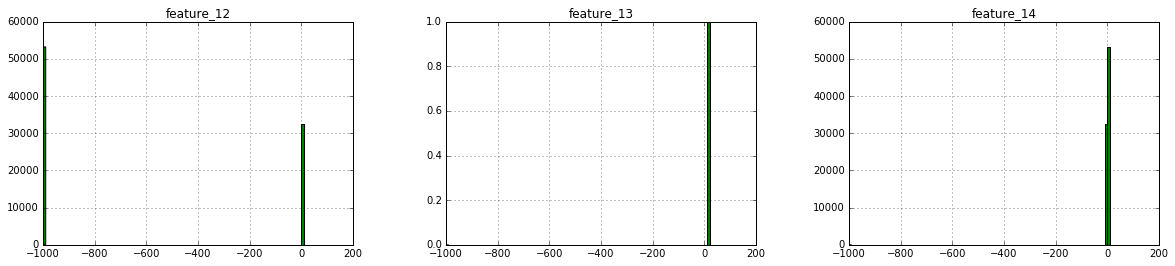

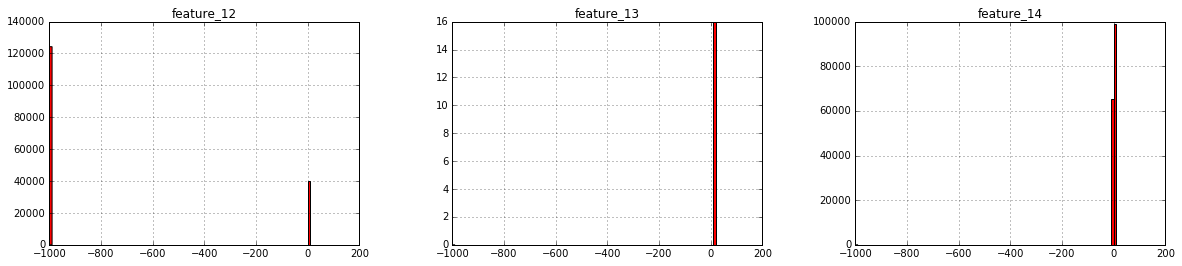

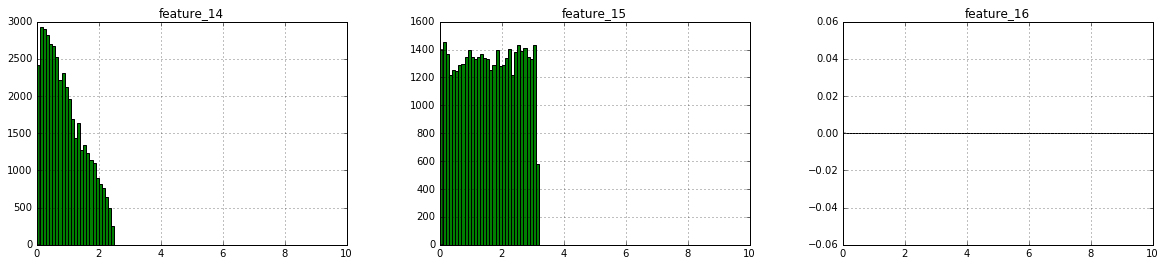

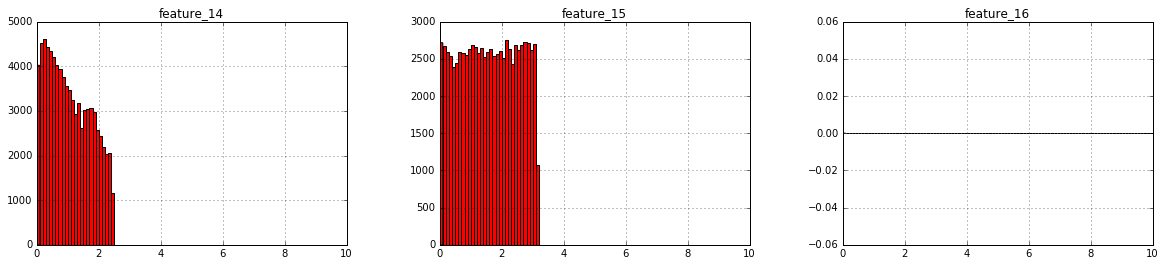

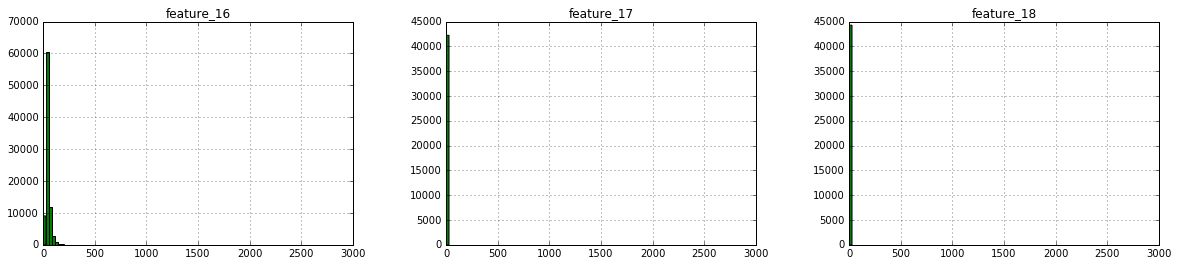

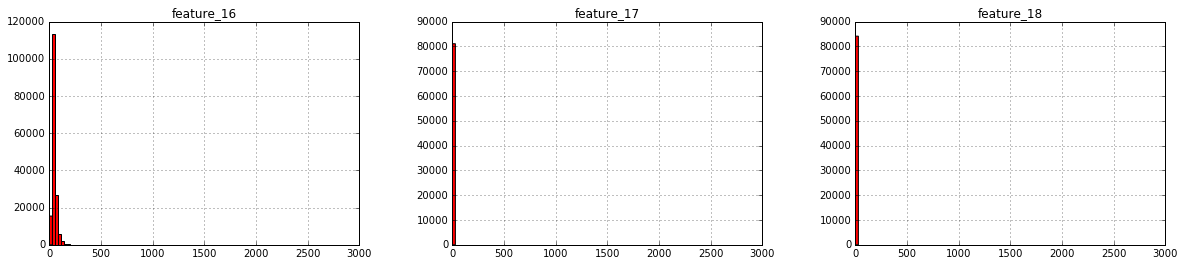

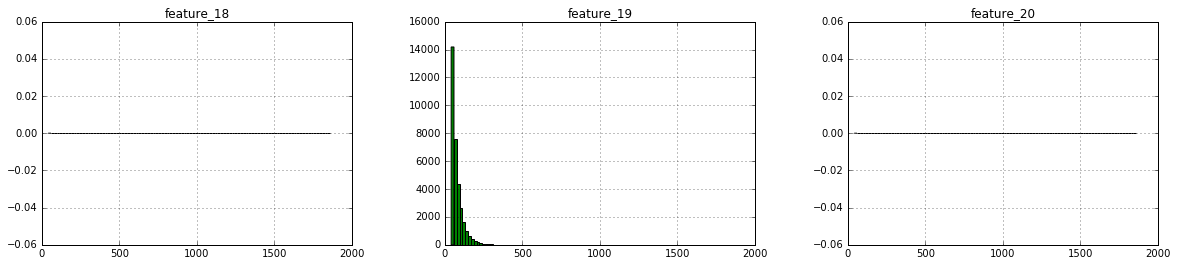

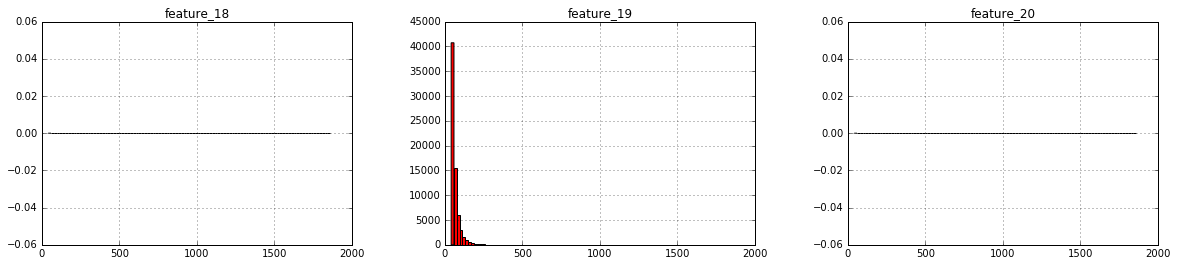

In [54]:
plots = []

for i in range (20):
    
    indx = []
    
    for ind in range (3):
        indx.append ('feature_' + str (int ((i // 2) * 2 + ind)))
        
    r = ranges [i // 2]
    
    if i % 2 == 0:
        plots.append ((df [df ['Prediction'] == 1] [indx]).hist (bins = 100, range = (r [0], r [1]), layout = (1, 3), figsize = (20, 4), facecolor = 'green'))
    else:
        plots.append ((df [df ['Prediction'] == -1] [indx]).hist (bins = 100, range = (r [0], r [1]), layout = (1, 3), figsize = (20, 4), facecolor = 'red'))
        
plots

The very first thing we can notice by looking at those histograms, is that there are some outliers. But, as there are a LOT of them, we can't simply get rid of it.